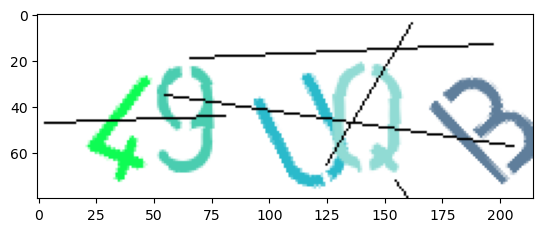

In [16]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

def show(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()


# sample_path = "./test-cases/pepper-noise-overlap.png"
# sample_path = "./test-cases/lines.png"
sample_path = "./test-cases/font-white-space.png"
# sample_path = "./test-cases/overlap3.png"

img = cv2.imread(sample_path)
show(img)


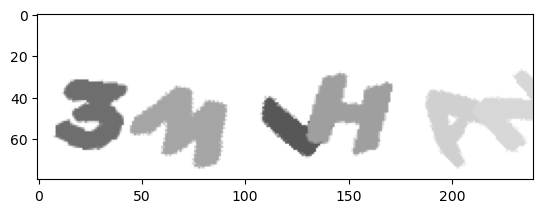

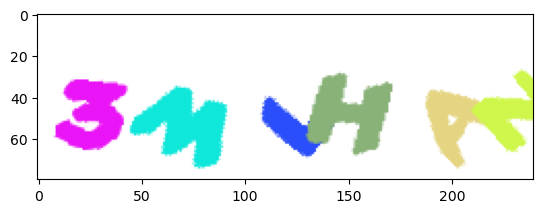

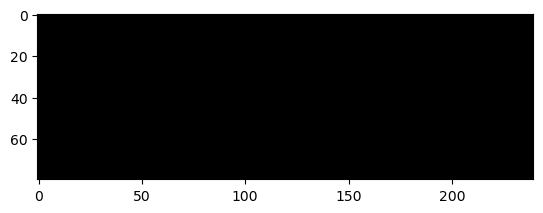

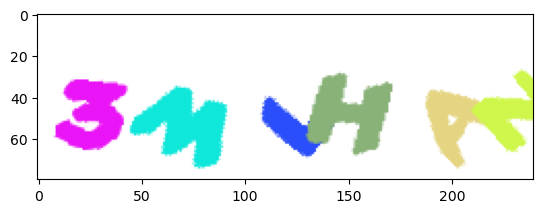

In [ ]:
#https://docs.opencv.org/3.4/df/d3d/tutorial_py_inpainting.html

lower_black = np.array([0, 0, 0])
upper_black = np.array([50, 50, 50])  # Adjust as needed based on line intensity

# Convert the image to a mask where black lines are white (255) and other areas are black (0)
mask = cv2.inRange(img, lower_black, upper_black)

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
show(gray)


# bw_img = np.uint8(np.where(gray!=255,255,0))
# show(bw_img)


# Step 2: Use inpainting to remove the black lines based on the mask
# cv2.INPAINT_TELEA and cv2.INPAINT_NS are two methods for inpainting
# TELEA is generally faster and works well for small, linear noise like lines
img_inpainted = cv2.inpaint(img, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

# Display results
# show(img)
# show(mask)
show(img_inpainted)

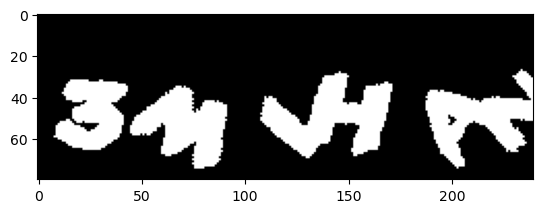

8 27 232 48


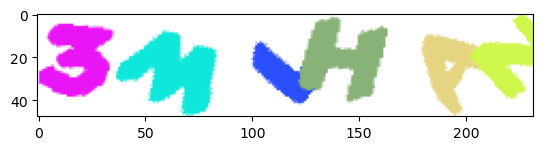

In [15]:
# Apply a binary threshold to create a mask
_, thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)  # Invert to make object white and background black
show(thresh)
# Find the bounding box of the non-white areas
coords = cv2.findNonZero(thresh)
x, y, w, h = cv2.boundingRect(coords)
print(x, y, w, h)
# Crop the image using the bounding box coordinates
cropped_image = img[y:y+h, x:x+w]
show(cropped_image)

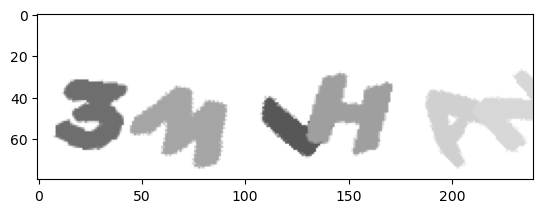

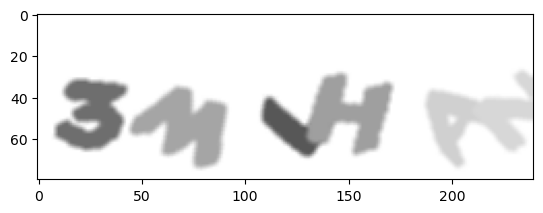

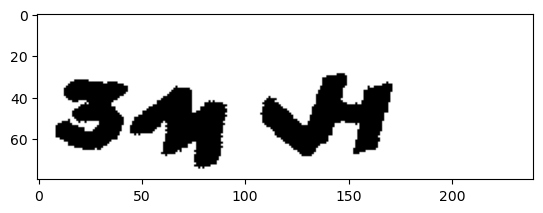

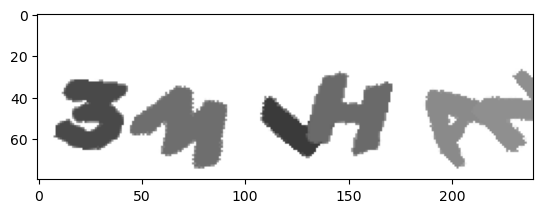

In [17]:
#https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

gray = cv2.cvtColor(img_inpainted,cv2.COLOR_BGR2GRAY)
show(gray)

gaussian_blurred = cv2.GaussianBlur(gray, (3, 3), 3)
show(gaussian_blurred)

_, bw_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

show(bw_img)

threshold_value = 240  # Set close to 255 to treat only near-white as "white"
_, mask = cv2.threshold(gray, threshold_value, 255, cv2.THRESH_BINARY)
darkened_image = gray.copy()
darkened_image[mask == 0] = darkened_image[mask == 0] // 1.5  # Example: halve the intensity of non-white regions
show(darkened_image)


In [ ]:

ret, thresh = cv2.threshold(darkened_image, 150, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contoured = darkened_image.copy()

for i, contour in enumerate(contours):
    contoured = darkened_image.copy()
    show(cv2.drawContours(contoured, contours, i, (0,255,0), 2))
# cv2.drawContours(contoured, contours, 1, (0,255,0), 2)
# show(thresh)
# show(contoured)


In [ ]:
def apply_gabor_filters(image, orientations=[0, 45, 90, 135], frequency=0.5):
    gabor_responses = []
    for theta in orientations:
        # Define a Gabor filter kernel
        gabor_kernel = cv2.getGaborKernel(ksize=(27, 27), sigma=4.0, theta=np.deg2rad(theta),
                                          lambd=10.0, gamma=0.5, psi=0)
        # Apply the filter
        filtered_img = cv2.filter2D(image, cv2.CV_8UC3, gabor_kernel)
        gabor_responses.append(filtered_img)
    # Combine responses by taking the maximum
    return gabor_responses


output = apply_gabor_filters(gray)
for img in output:
    show(img)